## Установка необходимого программного обеспечения и библиотек

### ОС и среда разработки

Если у вас нет Python, установите последнюю версию Python.
Рекомендуется использовать виртуальное окружение, например, virtualenv или conda.
Библиотеки для машинного обучения и обработки изображений

```python
!pip install opencv-python
!pip install dlib
!pip install tensorflow
```

Face++: Вам потребуется зарегистрироваться на официальном сайте Face++ и следовать инструкциям для установки и получения ключей API.
Дополнительные инструменты

```python
!pip install jupyter
```

LFW (Labeled Faces in the Wild)
[url="http://vis-www.cs.umass.edu/lfw/"]
Скачать базу данных
Это один из наиболее известных наборов данных, содержащий лица людей, снятых в "дикой" природе.
Создание собственного набора данных

In [13]:
import cv2

In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [15]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img


In [16]:
cap = cv2.VideoCapture(0)  # Запуск веб-камеры. 0 - это индекс камеры. Если у вас их несколько, можете попробовать 1, 2 и т. д.

while True:
    ret, frame = cap.read()  # Чтение кадра
    if not ret:
        break
    frame = detect_faces(frame)  # Распознавание лиц
    cv2.imshow('Face Detection', frame)  # Отображение кадра

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Закрыть окно при нажатии 'q'
        break

cap.release()
cv2.destroyAllWindows()


In [12]:
import face_recognition
import cv2

# Загрузите изображение с известным лицом
known_image = face_recognition.load_image_file("Raman.jpg")
known_face_encoding = face_recognition.face_encodings(known_image)[0]

# Инициализация веб-камеры
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()

    # Ищем лицо на кадре и извлекаем признаки
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
        name = "Unknown"

        if True in matches:
            name = "Raman"

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'face_recognition'

VGG-Face

In [9]:
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Загрузка модели VGG-Face
from keras.applications.vgg16 import VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt


In [17]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
# Загрузка изображения лица
img_path = 'egor.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Теперь вы можете использовать вектор признаков для сравнения с другими векторами
# или для классификации лиц, или для любых других задач, связанных с распознаванием лиц.


1/1 [==============================] - 0s 396ms/step


In [18]:
features.shape

(1, 4096)

2023-10-17 10:28:18.402605: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 10:28:18.460864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 10:28:18.461483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 10:28:19.488200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-17 10:28:21.500178: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-17 10:28:21.580154: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-17 1

1/1 [==============================] - 0s 302ms/step


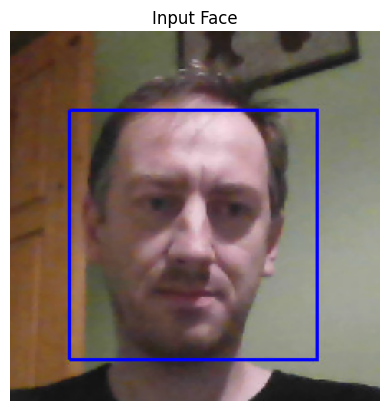

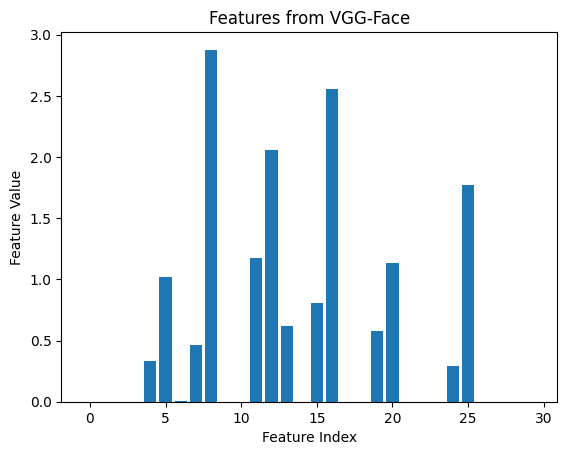

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Загрузка модели VGG-Face
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Загрузка и предварительная обработка изображения лица
img_path = 'egor.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Отображение изображения
plt.imshow(img)
plt.axis('off')
plt.title('Input Face')
plt.show()

# Отображение первых 30 признаков для наглядности (вы можете отобразить больше или меньше признаков)
plt.bar(range(30), features[0][:30])
plt.title('Features from VGG-Face')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()


In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Извлечение ROI лица с использованием OpenCV:

In [22]:
import cv2

# Загрузите предварительно обученный каскадный классификатор лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Чтение изображения
img = cv2.imread('egor.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Детекция лица
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    face_roi = img[y:y+h, x:x+w]  # извлекаем ROI лица для дальнейшего анализа


In [23]:
face_roi

array([[[ 33,  67, 103],
        [ 34,  68, 104],
        [ 32,  68, 104],
        ...,
        [101, 128, 125],
        [125, 123, 135],
        [121, 122, 132]],

       [[ 39,  67, 108],
        [ 39,  67, 108],
        [ 38,  68, 109],
        ...,
        [104, 135, 120],
        [120, 131, 128],
        [ 94, 128, 122]],

       [[ 35,  66, 111],
        [ 36,  67, 112],
        [ 36,  67, 112],
        ...,
        [118, 129, 127],
        [125, 123, 129],
        [116, 122, 129]],

       ...,

       [[ 72, 110, 152],
        [ 74, 112, 154],
        [ 76, 114, 156],
        ...,
        [137, 155, 154],
        [141, 156, 148],
        [142, 151, 154]],

       [[ 70, 110, 152],
        [ 74, 112, 154],
        [ 78, 113, 156],
        ...,
        [136, 154, 153],
        [143, 156, 148],
        [142, 151, 154]],

       [[ 69, 109, 151],
        [ 71, 111, 153],
        [ 76, 112, 152],
        ...,
        [135, 153, 152],
        [142, 155, 147],
        [143, 150, 153]]

In [24]:
face_img = cv2.resize(face_roi, (224, 224))
x = img_to_array(face_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Извлечение дескрипторов лица
raman_features = model.predict(x)


1/1 [==============================] - 0s 180ms/step


In [25]:
np.save('raman_features.npy', raman_features)


In [26]:
# Загрузка сохраненных дескрипторов
saved_features = np.load('raman_features.npy')

In [28]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array


# 1. Инициализация модели VGG-Face и извлечение слоя fc2
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# 2. Функция для детекции и извлечения признаков лица
def get_face_features(img_path):
    # Детекция лица с использованием OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]
    
    face_img = cv2.resize(face_roi, (224, 224))
    x = img_to_array(face_img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

# 3. Сравнение признаков лица
def is_match(saved_features, new_features, threshold=10):
    distance = np.linalg.norm(saved_features - new_features)
    return distance < threshold

# 4. Демонстрация функциональности
saved_features = np.load('raman_features.npy')
new_image_path = "egor.jpg"  # Замените на путь к новому изображению
new_features = get_face_features(new_image_path)

if is_match(saved_features, new_features):
    print("This is Raman!")
else:
    print("This is not Raman.")


1/1 [==============================] - 0s 249ms/step
This is Raman!


1/1 [==============================] - 0s 201ms/step


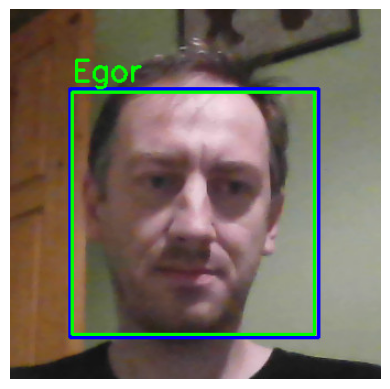

In [30]:
def display_image_with_results(img_path, features):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        if is_match(saved_features, features):
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, "Egor", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Raman", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    
    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Конвертация из BGR в RGB для корректного отображения в matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Теперь вызываем функцию:
new_image_path = "egor.jpg"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)


1/1 [==============================] - 0s 79ms/step


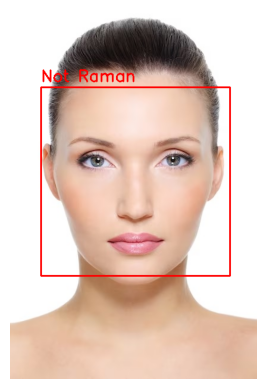

In [24]:
# Теперь вызываем функцию:
new_image_path = "Not_Raman.jpg"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)

In [38]:
!pip install keras-facenet
!pip install keras-vggface


In [1]:
import numpy as np
import cv2
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.models import Model
# Создание базовой модели FaceNet
base_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

def get_face_features(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_img = cv2.resize(img_rgb, (224, 224))
    face_img = np.expand_dims(face_img, axis=0)
    face_img = preprocess_input(face_img, version=2)  # используем version=2, т.к. это ResNet-50
    return base_model.predict(face_img)

def is_match(features1, features2, threshold=70):
    distance = np.linalg.norm(features1 - features2)
    return distance < threshold


ModuleNotFoundError: No module named 'keras_vggface'

In [32]:
def save_face_features(img_path, person_name):
    features = get_face_features(img_path)
    if features is not None:
        np.save(f'{person_name}_features.npy', features)

def load_face_features(person_name):
    return np.load(f'{person_name}_features.npy')

def display_image_with_results(img_path, features_dict):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Проверяем соответствие каждого дескриптора
        recognized_name = None
        for person_name, saved_features in features_dict.items():
            if is_match(saved_features, get_face_features(img_path)):
                recognized_name = person_name
                break

        if recognized_name:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, recognized_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [33]:
# Сохраняем дескрипторы лица с именем
person_name = 'Raman'
save_face_features('Raman.jpg', person_name)

1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 47ms/step


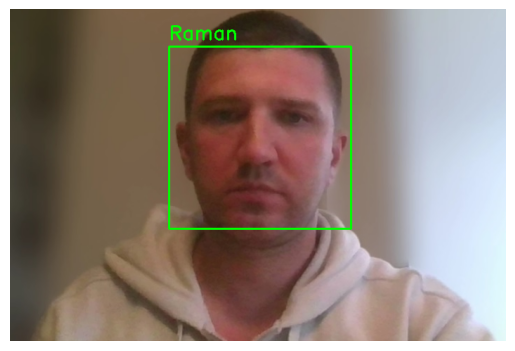

In [35]:
# Тестирование на новом изображении
new_image_path = "Raman.jpg"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)
